In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.array()

In [115]:
epsilon = 0.0001
alpha = 2
A = 200
B = 10
N = 10
scale = 100
h = 0.01 #step

all_points = [np.asarray([np.random.rand()*scale, np.random.rand()*scale, np.random.rand(), np.random.rand()]) \
                                                                                  for _ in np.arange(N) ]

coordinates_of_all_points = np.random.rand(N, 2)*scale
velocities_of_all_points = np.random.rand(N, 2)
print("Coordinates of all points:\n", coordinates_of_all_points, \
      "\n\nVelocities of all points:\n", velocities_of_all_points)


Coordinates of all points:
 [[27.00528897 67.46959521]
 [37.24908193 53.86351777]
 [ 0.84192297 37.02107593]
 [41.18171432 50.9329602 ]
 [23.71210319 98.63004266]
 [99.70056494 22.44305104]
 [21.15478901 71.43128987]
 [89.22514385  7.9473561 ]
 [63.54456342  4.59498031]
 [13.9391183  53.88489401]] 

Velocities of all points:
 [[0.76493695 0.65577154]
 [0.14322331 0.49605297]
 [0.01059243 0.04142107]
 [0.80841828 0.77181023]
 [0.91541322 0.48767926]
 [0.28643618 0.74484185]
 [0.50802123 0.65244828]
 [0.73350707 0.46444812]
 [0.16021432 0.6954799 ]
 [0.08659846 0.91920076]]


In [ ]:
def new_coordinates()

In [61]:
def force_of_interaction(point_ID1, point_ID2, delta_time):
    old_coord_diff = coordinates_of_all_points[point_ID2]- coordinates_of_all_points[point_ID1]
    old_velocity_diff = velocities_of_all_points[point_ID2]- velocities_of_all_points[point_ID1]
    new_coord_diff = old_velocity_diff * delta_time + old_coord_diff
    return new_coord_diff/np.power(np.linalg.norm(new_coord_diff), alpha)

In [62]:
def find_acceleration(point_ID, delta_velocity, delta_time):
    velocity = velocities_of_all_points[point_ID] + delta_velocity
    
    old_coord_diff = coordinates_of_all_points[point_ID2]- coordinates_of_all_points[point_ID1]
    old_velocity_diff = velocities_of_all_points[point_ID2]- velocities_of_all_points[point_ID1]
    coordinates = old_velocity_diff * delta_time + old_coord_diff
    return (   A-B*np.power(np.linalg.norm(velocity), 2)   )*velocity+\
                np.sum([force_of_interaction(point_ID, body_ID, delta_time) if all(body_ID != point_ID) else [0, 0] for body_ID in np.arange(N)], axis = 0)

In [63]:
def k_1_computation(point_ID):
    return h*find_acceleration(point_ID, 0)

In [79]:
def k_2_computation(point_ID):
    return h*find_acceleration(point+np.asarray([k_1_computation(point_ID), point[2:4]]).reshape(-1), h)

In [65]:
def new_velocity(point):
    return point[0:2] + (k_1_computation(point) + k_2_computation(point))/2

In [109]:
err = []
vels = [new_velocity(point) for point in all_points]
all_points = [np.asarray([velocity, point[2:4]]).reshape(-1) for (velocity, point) in zip(vels, all_points)]
for i in range(100):
    prev = vels
    vels = [new_velocity(point) for point in all_points]    
    all_points = [np.asarray([velocity, point[2:4]]).reshape(-1) for (velocity, point) in zip(vels, all_points)]
    err.append(np.linalg.norm(np.asarray(prev) - np.asarray(vels))/np.linalg.norm(np.asarray(vels)))

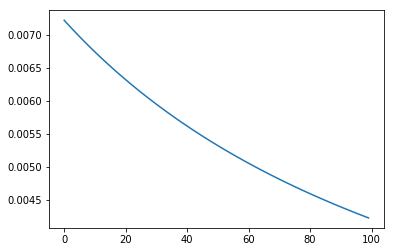

In [110]:
plt.plot(err)
plt.show()